# Udacity Data Analyst Nanodegree

## Project 4: Wrangle And Analyze Data - WeRateDogs

# Step 1: Wrangling and cleaning the data

<ul>
<li><a href="#introduction">1.1 Introduction</a></li>
<li><a href="#libraries">1.2 Load Libraries</a></li> 
<li><a href="#gathering">1.3 Gathering Data</a></li>
<li><a href="#assessing">1.4 Assessing Data</a></li> 
    <ul>
    <li><a href="#assessing v">1.4.1 Visual Assessment</a></li>
    <li><a href="#assessing p">1.4.2 Programmatic Assessment</a></li>
        <ul>
        <li><a href="#twitter">1.4.2.1 Twitter Archive</a></li>
        <li><a href="#image">1.4.2.2 Image Prediction</a></li>
        <li><a href="#table">1.4.2.3 Tweet Table</a></li>
        </ul>
        </ul>
<li><a href="#quality">1.5 Quality Issues</a></li> 
    <ul>
    <li><a href="#twitter q">1.5.1 Twitter Archive</a></li> 
    <li><a href="#image q">1.5.2 Image Prediction</a></li> 
    <li><a href="#table q">1.5.3 Tweet Table</a></li> 
    <ul>
    </ul>
    </ul>
<li><a href="#tidiness">1.6 Tidiness Issues</a></li> 
    <ul>
    <li><a href="#twitter t">1.6.1 Twitter Archive</a></li> 
    <li><a href="#image t">1.6.2 Image Prediction</a></li> 
    <li><a href="#table t">1.6.3 Tweet Table</a></li> 
    <ul>
    </ul>
    </ul>
<li><a href="#cleaing">1.7 Cleaning Data</a></li> 
<li><a href="#merging">1.8 Merging the dataframes together</a></li> 
<li><a href="#storing">1.9 Storing The Data</a></li> 
<li><a href="#insight 1">2.1 Insight and Visualization 1</a></li> 
<li><a href="#insight 2">2.2 Insight and Visualization 2</a></li> 
<li><a href="#insight 3">2.3 Insight 3</a></li> 
</ul>

<a id='introduction'></a>
## 1.1 Introduction
The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for making spectacualr and worthy analyses and visualizations.

<a id='libraries'></a>
## 1.2 Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='gathering'></a>
## 1.3 Gathering Data
Fist we start importing the .csv file provided by Udacity.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Step two in the gathering process is to programmatically download the dog image prediction files from the Udacity server using Request libary.

In [3]:
import os
import requests

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split ('/') [-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
images_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')

The third and last step is querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt.

In [5]:
import tweepy 
import json

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth,
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [6]:
list_of_tweets = []
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive ['tweet_id']:
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 598


KeyboardInterrupt: 

In [7]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [8]:
with open ('tweet_json.txt', 'w') as file:
    file.write(json.dumps(my_list_of_dicts, indent = 4))

In [9]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [10]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,38434,8446,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32924,6223,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24813,4125,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41782,8578,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39945,9307,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


<a id='assessing'></a>
## 1.4 Assessing Data
After gathering each of the above pieces of data, I need to assess them visually and programmatically for quality and tidiness issues. I need to find at least 8 quality issues and 2 tidiness issues.
<a id='assessing v'></a>
### 1.4.1 Visual Assessment

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
images_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,38434,8446,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32924,6223,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24813,4125,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41782,8578,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39945,9307,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,20054,3084,Sat Jul 29 00:08:17 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11731,2051,Fri Jul 28 16:27:12 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,64886,18752,Fri Jul 28 00:22:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27572,4234,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,31634,7342,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


<a id='assessing p'></a>
### 1.4.2 Programmatic Assessment
<a id='twitter'></a>
#### 1.4.2.1 Twitter Archive

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Buddy         7
Toby          7
Bailey        7
Daisy         7
an            7
Stanley       6
Leo           6
Oscar         6
Dave          6
Bella         6
Koda          6
Rusty         6
Milo          6
Scout         6
Jack          6
Jax           6
Alfie         5
           ... 
Sora          1
Blu           1
Monty         1
Major         1
Godzilla      1
Pherb         1
Antony        1
Derby         1
Adele         1
Wiggles       1
Staniel       1
light         1
Ember         1
Andy          1
Devón         1
Sobe          1
Gin           1
Josep         1
Karll         1
Rhino         1
Ricky         1
Tedders       1
Brady         1
Buckley       1
Lupe          1
Erik          1
Bode          1
Duchess       1
Beya          1
Franq         1
Name: name, Length: 957,

In [16]:
twitter_archive.retweeted_status_id.count()

181

In [17]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [22]:
twitter_archive[twitter_archive.text.str.contains(r'(\d+(\.\d+))\/(\d+)')]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


<a id='image'></a>
#### 1.4.2.2 Image Predictions

In [23]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
images_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [24]:
images_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

<a id='table'></a>
#### 1.4.2.3 Tweet Table

In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 7 columns):
tweet_id            886 non-null object
favorite_count      886 non-null int64
retweet_count       886 non-null int64
created_at          886 non-null object
source              886 non-null object
retweeted_status    886 non-null object
url                 886 non-null object
dtypes: int64(2), object(5)
memory usage: 48.5+ KB


In [26]:
tweet_json.nunique()

tweet_id            886
favorite_count      724
retweet_count       756
created_at          886
source                3
retweeted_status      2
url                 716
dtype: int64

In [27]:
tweet_json.source.value_counts()

Twitter for iPhone     864
Vine - Make a Scene     13
Twitter Web Client       9
Name: source, dtype: int64

In [28]:
tweet_json.retweeted_status.value_counts()

Original tweet       731
This is a retweet    155
Name: retweeted_status, dtype: int64

<a id='quality'></a>
## 1.5 Quality Issues
Issues with the data's content
<a id='twitter q'></a>
### 1.5.1 Twitter Archive
- There are 181 retweets which need to be removed from the dataframe.
- Some names of dogs are misspelled, misslabelled or missing.
- Delete columns that won't be used for analysis
- Seperate timestamp into day - month - year
- The rating_numerator and rating_denumerator fields are both kept as integers. This is not correct as there are observations with decimal ratings.
<a id='image q'></a>
### 1.5.2 Image Predictions
- The writing in the P1 is missing some capitals. 
- The writing in the P2 is missing some capitals. 
- The writing in the P3 is missing some capitals.
- There is a _ in between words which can be removed.
<a id='table q'></a>
### 1.5.3 Tweet Table
- There are 165 retweets that can be removed.

<a id='tidiness'></a>
## 1.6 Tidiness Issues
Issues with the structure of the data
<a id='twitter t'></a>
### 1.6.1 Twitter Archive
- Combine dog stage (doggo, floofer, pupper, and puppo) to a single column named 'Stage'.
- Tweet_id needs to be converted to a string.
<a id='image t'></a>
### 1.6.2 Image Predictions
- Tweet_id needs to be converted to a string.
<a id='tweet t'></a>
### 1.6.3 Tweet Table
- Nothing

After all this I need to perform an inner join to merge all the three datasets together.

<a id='cleaning'></a>
## 1.7 Cleaning Data

In [29]:
archive_clean = twitter_archive.copy()
predictions_clean = images_predictions.copy()
tweet_clean = tweet_json.copy()

### Define

Exclude all the 181 retweets from the dataframe.

### Code

In [30]:
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull() == True].index, inplace = True)

### Test

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define

Replacing and correcting faulty dog names.

### Code

In [32]:
archive_clean['name'].replace('the', 'None', inplace = True)
archive_clean['name'].replace('light', 'None', inplace = True)
archive_clean['name'].replace('life', 'None', inplace = True)
archive_clean['name'].replace('an', 'None', inplace = True)
archive_clean['name'].replace('a', 'None', inplace = True)
archive_clean['name'].replace('by', 'None', inplace = True)
archive_clean['name'].replace('actually', 'None', inplace = True)
archive_clean['name'].replace('just', 'None', inplace = True)
archive_clean['name'].replace('getting', 'None', inplace = True)
archive_clean['name'].replace('infuriating', 'None', inplace = True)
archive_clean['name'].replace('old', 'None', inplace = True)
archive_clean['name'].replace('all', 'None', inplace = True)
archive_clean['name'].replace('this', 'None', inplace = True)
archive_clean['name'].replace('very', 'None', inplace = True)
archive_clean['name'].replace('mad', 'None', inplace = True)
archive_clean['name'].replace('not', 'None', inplace = True)
archive_clean['name'].replace('one', 'None', inplace = True)
archive_clean['name'].replace('my', 'None', inplace = True)
archive_clean['name'].replace('O', "O'Malley", inplace = True)
archive_clean['name'].replace('quite', 'None', inplace = True)
archive_clean['name'].replace('such', 'None', inplace = True)

### Test

In [33]:
archive_clean.name.value_counts()

None          779
Lucy           11
Charlie        11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Lola            8
Sadie           8
Winston         8
Daisy           7
Toby            7
Jax             6
Koda            6
Bella           6
Stanley         6
Bo              6
Oscar           6
Bailey          6
Leo             5
Dave            5
Scout           5
Chester         5
Milo            5
Bentley         5
Louis           5
Rusty           5
Buddy           5
Gary            4
Derek           4
             ... 
Mitch           1
Quinn           1
Brooks          1
Grey            1
Buckley         1
Tedders         1
Toffee          1
Ricky           1
Rodman          1
Stephanus       1
Butter          1
Ronnie          1
Tebow           1
Ole             1
Beebop          1
Jazzy           1
Christoper      1
Nigel           1
Derby           1
Wiggles         1
Staniel         1
Ember           1
Andy            1
Pepper          1
Gin       

### Define

Delete columns that won't be used for analysis.

### Code

In [34]:
archive_clean.drop('source', axis=1, inplace=True)
archive_clean.drop('in_reply_to_status_id', axis=1, inplace=True)
archive_clean.drop('in_reply_to_user_id', axis=1, inplace=True)
archive_clean.drop('retweeted_status_id', axis=1, inplace=True)
archive_clean.drop('retweeted_status_user_id', axis=1, inplace=True)
archive_clean.drop('retweeted_status_timestamp', axis=1, inplace=True)
archive_clean.drop('expanded_urls', axis=1, inplace=True)

### Test

In [35]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Define

Seperate timestamp into day - month - year

### Code

In [36]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day

archive_clean.drop('timestamp', axis=1, inplace=True)

### Test

In [37]:
archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,7,29


### Define

Changing the rating_numerator and rating_denumerator to floats so it shows decimals and thus the right values.

### Code

In [47]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

In [62]:
archive_clean['rating_numerator'].replace(5, 13.5, inplace = True)
archive_clean['rating_numerator'].replace(75, 9.75, inplace = True)
archive_clean['rating_numerator'].replace(27, 11.27, inplace = True)
archive_clean['rating_numerator'].replace(26, 11.26, inplace = True)

### Test

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 220.9+ KB


In [63]:
archive_clean[archive_clean['tweet_id'] == 883482846933004288].rating_numerator

45    13.5
Name: rating_numerator, dtype: float64

In [64]:
archive_clean[archive_clean['tweet_id'] == 786709082849828864].rating_numerator

695    9.75
Name: rating_numerator, dtype: float64

In [65]:
archive_clean[archive_clean['tweet_id'] == 778027034220126208].rating_numerator 

763    11.27
Name: rating_numerator, dtype: float64

In [66]:
archive_clean[archive_clean['tweet_id'] == 680494726643068929].rating_numerator

1712    11.26
Name: rating_numerator, dtype: float64

### Define

Making sure all the different breeds of dogs start with a capital in P1, P2 and P3.

### Code

In [71]:
predictions_clean['p1'] = predictions_clean['p1'].str.title()
predictions_clean['p2'] = predictions_clean['p2'].str.title()
predictions_clean['p3'] = predictions_clean['p3'].str.title()

### Test

In [72]:
predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,Miniature_Schnauzer,0.367368,True,Toy_Poodle,0.112479,True,Standard_Schnauzer,0.095434,True
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_Bullterrier,0.219609,True,American_Staffordshire_Terrier,0.178671,True,Pug,0.123271,True
1648,808838249661788160,https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg,1,Rottweiler,0.369530,True,Miniature_Pinscher,0.194867,True,Kelpie,0.160104,True
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,Basset,0.164555,True,Toy_Terrier,0.080484,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_Terrier,0.071981,True,Lhasa,0.069231,True
1699,816829038950027264,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,Dishwasher,0.700466,False,Golden_Retriever,0.245773,True,Chow,0.039012,True
125,668248472370458624,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,1,Chihuahua,0.734547,True,Miniature_Pinscher,0.068294,True,Toy_Terrier,0.046367,True
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,Golden_Retriever,0.649209,True,Chesapeake_Bay_Retriever,0.198560,True,Vizsla,0.056200,True
1359,760893934457552897,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_Spaniel,0.113992,True,Cocker_Spaniel,0.105780,True,Borzoi,0.073935,True
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,Doormat,0.845256,False,Wallet,0.095718,False,Wool,0.026072,False


### Define

Removing the _ from the different breeds of dogs in the P1, P2 and P3 columns.

### Code

In [73]:
predictions_clean['p1'] = predictions_clean['p1'].str.replace('_', ' ')
predictions_clean['p2'] = predictions_clean['p2'].str.replace('_', ' ')
predictions_clean['p3'] = predictions_clean['p3'].str.replace('_', ' ')

### Test

In [74]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

Removing the retweets from the retweeted_status column

### Code

In [75]:
tweet_clean['retweeted_status'] = tweet_clean.retweeted_status.str.replace('This is a retweet' , '')

### Test

In [76]:
tweet_clean.retweeted_status.value_counts()

Original tweet    731
                  155
Name: retweeted_status, dtype: int64

### Define

Combine dog stage (doggo, floofer, pupper, and puppo) to a single column named 'Stage'.

### Code

In [77]:
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

archive_clean['stage'].replace('NoneNoneNoneNone', 'None', inplace = True)
archive_clean['stage'].replace('doggoNoneNoneNone', 'doggo', inplace = True)
archive_clean['stage'].replace('NoneflooferNoneNone', 'floofer', inplace = True)
archive_clean['stage'].replace('NoneNonepupperNone', 'pupper', inplace = True)
archive_clean['stage'].replace('NoneNoneNonepuppo', 'puppo', inplace = True)

archive_clean.drop('doggo', axis=1, inplace=True)
archive_clean.drop('floofer', axis=1, inplace=True)
archive_clean.drop('pupper', axis=1, inplace=True)
archive_clean.drop('puppo', axis=1, inplace=True)

### Test

In [78]:
archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,None


### Define

Converting Tweet_id to a string.

### Code

In [79]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

### Test

In [80]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
stage                 2175 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 169.9+ KB


### Define

Converting Tweet_id to a string.

### Code

In [81]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

### Test

In [82]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<a id='merging'></a>
## 1.8 Merging the dataframes together 

In [83]:
df_merge = pd.merge(archive_clean, tweet_clean, on = 'tweet_id', how = 'inner' )

In [84]:
df_merge = pd.merge(df_merge, predictions_clean, on = 'tweet_id', how = 'inner')
df_merge.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,None,38434,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,None,32924,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,None,24813,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,None,41782,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,None,39945,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


<a id='storing'></a>
## 1.9 Storing the Data

In [85]:
folder_name = 'Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
archive_clean.to_csv('Final_Documents/twitter_archive_master.csv')
predictions_clean.to_csv('Final_Documents/image_prediction_master.csv')
tweet_clean.to_csv('Final_Documents/tweet_query_master.csv')
df_merge.to_csv('Final_Documents/final_master.csv')

# Step 2: Analyzing the data

In [86]:
df_merge = pd.read_csv('Final_Documents/final_master.csv')
df_merge.head()

,Unnamed: 0,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,None,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,None,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,None,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


<a id='insight 1'></a>
## 2.1 Insight and Visualization 1

In [87]:
common_names = df_merge.name.value_counts().head(6)
common_names

None       126
Charlie      6
Tucker       5
Penny        5
Lucy         4
Stanley      4
Name: name, dtype: int64

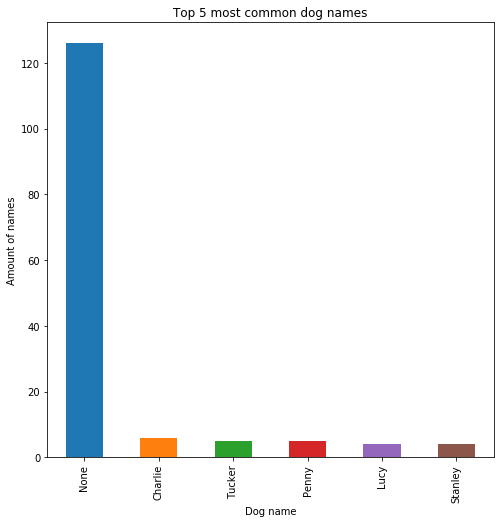

In [88]:
common_names.plot(kind = 'bar', figsize = (8, 8)) 
plt.title ('Top 5 most common dog names')
plt.xlabel ('Dog name')
plt.ylabel ('Amount of names');

It turns out that Charlie is the most common dog name. It has been chosen 6 times which isn't a lot. This means that people are quite creative when it comes to naming their dogs.

<a id='insight 2'></a>
## 2.2 Insight and Visualization 2

In [91]:
most_common_dog = df_merge.p1.value_counts().head()
most_common_dog

Golden Retriever      65
Labrador Retriever    37
Pembroke              36
Chihuahua             21
Chow                  20
Name: p1, dtype: int64

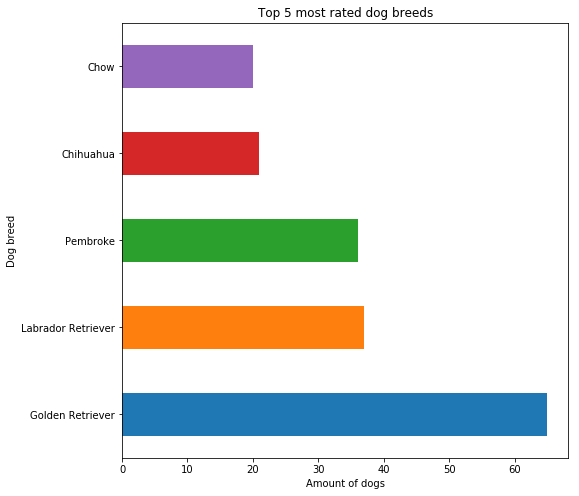

In [93]:
most_common_dog.plot(kind = 'barh', figsize = (8, 8)) 
plt.title ('Top 5 most rated dog breeds')
plt.xlabel ('Amount of dogs')
plt.ylabel ('Dog breed');

It turns out that a Golden Retriever is the most rated dog. It has been rated 65 times which is a lot more than the number two breed of dog.

<a id='insight 3'></a>
## 2.3 Insight 3

In [94]:
df_merge.favorite_count.max()

141882

In [96]:
df_merge[df_merge['favorite_count'] == 141882]

,Unnamed: 0,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,309,822872901745569793,Here's a super supportive puppo participating ...,13.0,10.0,None,2017,1,21,puppo,...,1,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True


It turns out that the most favorited tweet is from a dog without a name. The tweet ID is 822872901745569793 and the picture can be viewed by cliking this link: https://t.co/nTz3FtorBc.

#### Links used
- https://tweepy.readthedocs.io/en/v3.5.0/index.html
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
- https://www.tutorialspoint.com/python/string_title.htm